In [1]:
from keras.datasets import mnist
!pip install numpy==1.16.1


Using TensorFlow backend.


     |████████████████████████████████| 17.3MB 4.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


In [2]:
from keras import models
from keras import layers
from keras.utils import to_categorical
# loading data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
train_images.dtype

dtype('uint8')

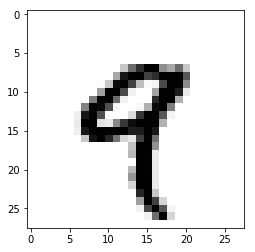

In [6]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [7]:
#شکل دهی اولیه داده ها که در اینجا ارایه سه بعدی مان را به یک ارایه دو بعدی تبدیل کردیم 
train_images = train_images.reshape((60000, 28 * 28))
#شکل دهی نوع اولیه داده که ان را بین 0 تا یک اوردیم
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
#one hot coding 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#تعیین معماری شبکه 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu' , input_shape=(28 * 28,)))
#لایه نتیجه 
#softmax یک توضیع احتمال به ما میدهد
network.add(layers.Dense(10, activation='softmax'))
#تعیین توابع یادگیری
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy' ,
               metrics=['accuracy'])
#اجرای یادگیری
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.2561 - acc: 0.9267
Epoch 2/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.1040 - acc: 0.9688
Epoch 3/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0689 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0500 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0378 - acc: 0.9884


In [0]:
test_loss, test_acc=network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 50us/step
test_acc: 0.9788


test_acc: 0.9788 

---


تفاوت این 1 درصد بین داده یادگیری با تست به علت بیش برازش  (over fitting)
است